# Calculadora de aluguel

# 1. Tarefa: Calculadora de Aluguel - Coleta de Dados

In [32]:
%matplotlib inline
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import GridSearchCV
import sklearn

In [2]:
data = fetch_california_housing()

In [3]:
df = pd.DataFrame(data = data['data'], columns = data['feature_names'])

In [5]:
df['Target'] = data['target']

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# 2. Tarefa: Calculadora de Aluguel - Manipulação de Dados

# 2.1 Tratamento e distirbuição dos dados

Primeiramente, verifica-se que não há dados faltantes, ou seja, não é necessário lidar com dados nulos.

Além disso, as variáveis são contínuas e padronizadas.

Ainda assim, as variáveis possuem escalas diferentes. Por isso, será aplicado um método de feature scaling aprendido em aula: o MinMax Scaler. Esse scaler é utilizado em distribuições normais e é sensível a outliers. Por isso, foram plotados histogramas e boxplots das variáveis do dataset. Os histogramas mostram que as distribuições das variáveis não são todas normais e que há outliers nos dados, por isso, os dados também serão transformados pelo Robust Scaler, que não é sensível a outliers. Os modelos preditivos serão plotados com ambos os scalers para verificar qual permite realizar a melhor predição.

In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


[]

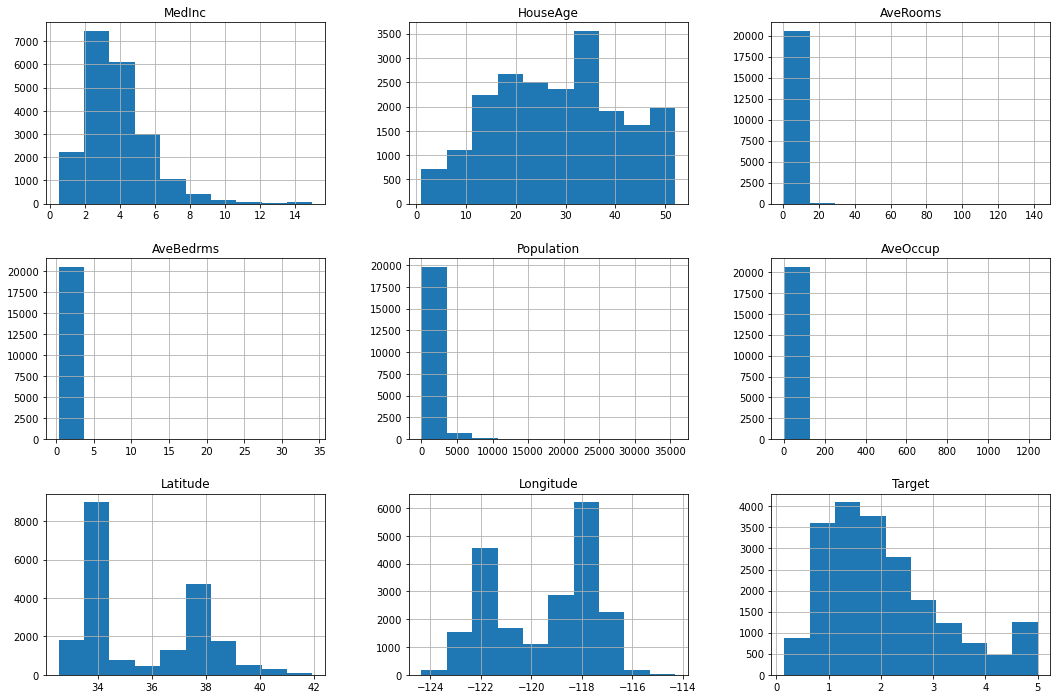

In [14]:
df.hist(figsize=(18,12))
plt.plot()

[]

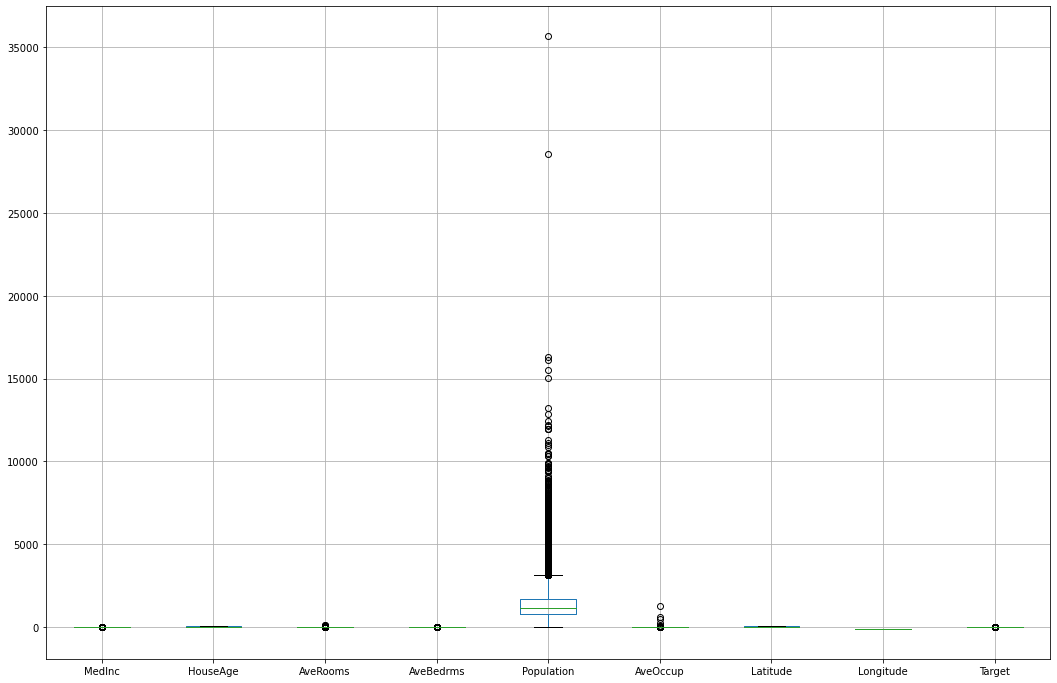

In [15]:
df.boxplot(figsize=(18,12))
plt.plot()

# 2.2 Feature Scaling - Min Max Scaler

In [17]:
X_columns = data['feature_names']
scaler = MinMaxScaler()
df.loc[:,X_columns] = scaler.fit_transform(df[X_columns])
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.232464,0.541951,0.032488,0.022629,0.039869,0.001914,0.328572,0.476125,2.068558
std,0.131020,0.246776,0.017539,0.014049,0.031740,0.008358,0.226988,0.199555,1.153956
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.149990
25%,0.142308,0.333333,0.025482,0.019943,0.021974,0.001398,0.147715,0.253984,1.196000
50%,0.209301,0.549020,0.031071,0.021209,0.032596,0.001711,0.182784,0.583665,1.797000
75%,0.292641,0.705882,0.036907,0.022713,0.048264,0.002084,0.549416,0.631474,2.647250
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000010


In [22]:
robust_scaler = RobustScaler()
df.loc[:,X_columns] = robust_scaler.fit_transform(df[X_columns])
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.154080,-0.018974,0.124015,0.512533,0.276628,0.296227,0.362926,-0.284882,2.068558
std,0.871538,0.662398,1.535166,5.071439,1.207316,12.182767,0.565067,0.528636,1.153956
min,-1.392252,-1.473684,-2.719533,-7.656179,-1.239872,-2.493559,-0.455026,-1.546174,0.149990
25%,-0.445627,-0.578947,-0.489191,-0.456959,-0.404051,-0.455561,-0.087302,-0.873351,1.196000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.797000
75%,0.554373,0.421053,0.510809,0.543041,0.595949,0.544439,0.912698,0.126649,2.647250
max,5.259674,1.210526,84.806698,353.332681,36.797441,1455.116059,2.034392,1.102902,5.000010


# 3. Tarefa: Calculadora de Aluguel - Machine Learning

1. Modelo regressivo: Aqui, utiliza-se um modelo regressivo de support machine vector (SVR) para prever os preços dos alugueis.
2. Feature scaling: Os modelos foram rodados com dois tipos de feature scaling: Min Max Scaler e Robust Scaler.
3. Avaliação dos modelos: a avaliação dos modelos é feita pelo MSE, métrica que permite comparar modelos preditivos e quanto menor o índice, menor o erro da predição. Isso mostra que o modelo com robust scaler performou um pouco melhor que o de min max scaler, e o erro é de 0,4444.
4. Hiperparâmetro e cross validation: Com esses métodos, foi gerado um modelo com RMSE de o,66. Como apresentou maior nível de erro que o modelo de regressão sem esses métodos, esse modelo não apresentou melhoras.
5. Evolução do projeto: Como evolução do projeto, é interessante testar outros parâmetros de tunning e cross validation para obter melhores resultados. Além disso, é possível testar outros métodos de regressão como árvore de decisão.

# 3.1 Regressão com Min Max Scaler

In [23]:
X = df[X_columns]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [19]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
mse(y_test,y_pred)

0.4529976364589729

# 3.2 Regressão com Robust Scaler

In [24]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
mse(y_test,y_pred)

0.4443991160635302

# 3.3 Tunning hiperparametros (Grid Search)

In [26]:
parametros = {'kernel':['rbf','poly','sigmoid'],
              'C':[0.001,1.0,5.0,100.0]}

In [29]:
gridsearch = GridSearchCV(svr, 
                          parametros,
                          scoring="neg_mean_squared_error",
                          verbose=1)

In [ ]:
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [33]:
scores = cross_val_score(svr, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

In [34]:
rmse = np.sqrt(-scores)
scores, rmse

(array([-0.45754499, -0.41529552, -0.43075146, -0.39728363, -0.44614413,
        -0.43670923, -0.38661877, -0.42371417, -0.45201266, -0.44246029]),
 array([0.67642072, 0.64443426, 0.65631658, 0.6303044 , 0.66794021,
        0.66083979, 0.62178676, 0.65093331, 0.67231887, 0.66517689]))

In [37]:
print("RMSE: " + str(rmse.mean()))

RMSE: 0.6546471788887842
